In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
target = ['Stlhd']

In [4]:
file_path = Path('Resources/week_averages.csv')
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Week_Number,Stlhd,TempC
0,0,1,15.750000,4.894828
1,1,2,14.567164,4.606250
2,2,3,13.480620,4.032653
3,3,4,13.280303,3.773196
4,4,5,14.577236,3.724490


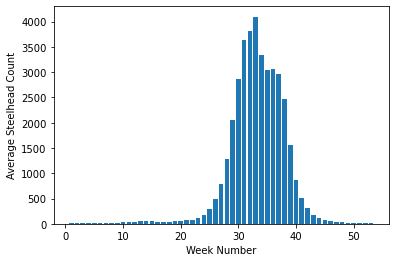

In [5]:
plt.bar(df.Week_Number, df.Stlhd)
plt.xlabel('Week Number')
plt.ylabel('Average Steelhead Count')
plt.show()

# Machine learning

In [ ]:
# Creating features
X = df.drop('Stlhd', axis=1)
X = pd.get_dummies(X)

# Creating target
y = df.loc[:, target].copy()

In [ ]:
X.describe()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
y.describe()

In [ ]:
plt.scatter(df.Week_Number, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:

print(accuracy_score(y_test, y_pred))